In [144]:
import pandas as pd

In [145]:
closingPrices = pd.read_csv('ClosingPrices.csv', index_col=0)

In [146]:
closingPrices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2597 entries, 2010-11-04 to 2021-04-29
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MUNDRAPORT  2597 non-null   float64
 1   ASIANPAINT  2597 non-null   float64
 2   AXISBANK    2597 non-null   float64
 3   BAJAJ-AUTO  2597 non-null   float64
 4   BAJAJFINSV  2597 non-null   float64
 5   BAJFINANCE  2597 non-null   float64
 6   BHARTIARTL  2597 non-null   float64
 7   BPCL        2597 non-null   float64
 8   BRITANNIA   2597 non-null   float64
 9   CIPLA       2597 non-null   float64
 10  COALINDIA   2597 non-null   float64
 11  DRREDDY     2597 non-null   float64
 12  EICHERMOT   2597 non-null   float64
 13  GAIL        2597 non-null   float64
 14  GRASIM      2597 non-null   float64
 15  HCLTECH     2597 non-null   float64
 16  HDFC        2597 non-null   float64
 17  HDFCBANK    2597 non-null   float64
 18  HEROHONDA   2597 non-null   float64
 19  HINDALCO    2597 

In [147]:
print(closingPrices.isnull().sum())

MUNDRAPORT    0
ASIANPAINT    0
AXISBANK      0
BAJAJ-AUTO    0
BAJAJFINSV    0
BAJFINANCE    0
BHARTIARTL    0
BPCL          0
BRITANNIA     0
CIPLA         0
COALINDIA     0
DRREDDY       0
EICHERMOT     0
GAIL          0
GRASIM        0
HCLTECH       0
HDFC          0
HDFCBANK      0
HEROHONDA     0
HINDALCO      0
HINDUNILVR    0
ICICIBANK     0
INDUSINDBK    0
INFOSYSTCH    0
IOC           0
ITC           0
JSWSTEEL      0
KOTAKBANK     0
LT            0
MARUTI        0
M&M           0
NESTLEIND     0
NTPC          0
ONGC          0
POWERGRID     0
RELIANCE      0
SBIN          0
SHREECEM      0
SUNPHARMA     0
TATAMOTORS    0
TATASTEEL     0
TCS           0
TECHM         0
TITAN         0
ULTRACEMCO    0
UNIPHOS       0
SESAGOA       0
WIPRO         0
ZEEL          0
dtype: int64


In [148]:
for x in closingPrices.columns:
    median_value = closingPrices[x].median()
    closingPrices[x] = closingPrices[x].apply(lambda x: 0 if x < median_value else 1)


In [149]:
closingPrices

,MUNDRAPORT,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,BRITANNIA,CIPLA,...,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UNIPHOS,SESAGOA,WIPRO,ZEEL
Date,,,,,,,,,,,,,,,,,,,,,
2010-11-04,0,1,1,0,0,0,0,1,0,0,...,1,1,0,1,1,0,0,1,1,1
2010-11-05,0,1,1,0,0,0,0,1,0,0,...,1,1,0,1,1,0,0,1,1,1
2010-11-08,0,1,1,0,0,0,0,1,0,0,...,1,1,0,1,1,0,0,1,1,1
2010-11-09,0,1,1,0,0,0,0,1,0,0,...,1,1,0,1,1,0,0,1,1,1
2010-11-10,0,1,1,0,0,0,0,1,0,0,...,1,1,0,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-23,1,1,1,1,1,1,1,0,1,1,...,0,1,1,1,1,1,1,1,1,0
2021-04-26,1,1,1,1,1,1,1,0,1,1,...,0,1,1,1,1,1,1,1,1,0
2021-04-27,1,1,1,1,1,1,1,0,1,1,...,0,1,1,1,1,1,1,1,1,0


In [150]:
train_data = closingPrices.loc['2011-01-01':'2019-12-31',]
# train_data = closingPrices.loc['2019-12-01':'2019-12-31',]
test_data = closingPrices.loc['2020-01-01':'2020-12-31',]

In [151]:
variables = []
column = list(closingPrices.columns)
for i in range(len(column)):
    for j in range(i+1, len(column)):
        variables.append((column[i],column[j]))

In [152]:
train_data

,MUNDRAPORT,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,BRITANNIA,CIPLA,...,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UNIPHOS,SESAGOA,WIPRO,ZEEL
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,0,1,1,0,0,0,1,1,0,0,...,1,1,0,1,1,0,0,1,1,0
2011-01-04,0,1,1,0,0,0,1,1,0,0,...,1,1,0,1,1,0,0,1,1,0
2011-01-05,0,1,1,0,0,0,0,1,0,0,...,1,1,0,1,1,0,0,1,1,0
2011-01-06,0,1,1,0,0,0,0,1,0,0,...,1,1,0,1,1,0,0,1,1,0
2011-01-07,0,1,1,0,0,0,0,1,0,0,...,1,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1,1,1,1,1,1,1,0,1,0,...,0,1,1,1,1,1,1,0,0,1
2019-12-26,1,1,1,1,1,1,1,0,1,0,...,0,1,1,1,1,1,1,0,0,1
2019-12-27,1,1,1,1,1,1,1,0,1,0,...,0,1,1,1,1,1,1,0,0,1


In [153]:
r = open("dependency_matrix.csv", 'w')
stocks = list(train_data.columns)
with r as csv_file:
    # Write the header row
    header = 'Stock,'
    csv_file.write('Stock,')
    for i in range(len(stocks)-1):
        csv_file.write(stocks[i] + ',')
    csv_file.write(stocks[-1])
    csv_file.write('\n')
    for i in stocks:
        csv_file.write(i + '\n')
        

In [154]:
dependency_matrix = pd.read_csv('dependency_matrix.csv', index_col=0)
dependency_matrix = dependency_matrix.fillna(0)

In [155]:
rows = list(train_data.index)
columns = list(train_data.columns)
for i in range(1,len(rows)):
    mapped_fluctuations = {0: [], 1: [], -1: []}
    for j in range(len(columns)):
        if((train_data[column[j]][rows[i]] - train_data[column[j]][rows[i-1]]) == 1):
            mapped_fluctuations[1].append(columns[j])
        elif((train_data[column[j]][rows[i]] - train_data[column[j]][rows[i-1]]) == -1):
            mapped_fluctuations[-1].append(columns[j])
        else:
            mapped_fluctuations[0].append(columns[j])
    for j in range(len(mapped_fluctuations[1])):
        for k in range(len(mapped_fluctuations[1])):
            dependency_matrix[mapped_fluctuations[1][j]][mapped_fluctuations[1][k]] += 1
    for j in range(len(mapped_fluctuations[1])):
        for k in range(len(mapped_fluctuations[-1])):
            dependency_matrix[mapped_fluctuations[1][j]][mapped_fluctuations[-1][k]] -= 1
    for j in range(len(mapped_fluctuations[-1])):
        for k in range(len(mapped_fluctuations[1])):
            dependency_matrix[mapped_fluctuations[-1][j]][mapped_fluctuations[1][k]] -= 1
    for j in range(len(mapped_fluctuations[-1])):
        for k in range(len(mapped_fluctuations[-1])):
            dependency_matrix[mapped_fluctuations[-1][j]][mapped_fluctuations[-1][k]] += 1
dependency_matrix

,MUNDRAPORT,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,BRITANNIA,CIPLA,...,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UNIPHOS,SESAGOA,WIPRO,ZEEL
Stock,,,,,,,,,,,,,,,,,,,,,
MUNDRAPORT,25.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,3.0,...,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
ASIANPAINT,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-1.0,...,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,-1.0,0.0
AXISBANK,0.0,0.0,12.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
BAJAJ-AUTO,3.0,0.0,0.0,35.0,0.0,0.0,3.0,0.0,0.0,0.0,...,1.0,2.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0
BAJAJFINSV,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BAJFINANCE,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
BHARTIARTL,1.0,0.0,1.0,3.0,0.0,0.0,108.0,0.0,1.0,0.0,...,5.0,1.0,-1.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0
BPCL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BRITANNIA,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,31.0,2.0,...,0.0,0.0,2.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0


In [156]:
for i in dependency_matrix.columns:
    dependency_matrix[i] /= dependency_matrix[i][i]
dependency_matrix

,MUNDRAPORT,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,BRITANNIA,CIPLA,...,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UNIPHOS,SESAGOA,WIPRO,ZEEL
Stock,,,,,,,,,,,,,,,,,,,,,
MUNDRAPORT,1.00,0.000000,0.000000,0.085714,0.000000,0.000000,0.009259,0.000000,0.000000,0.06,...,0.000000,0.078947,0.019231,0.000000,0.000,0.000000,0.058824,0.000000,0.000000,0.030303
ASIANPAINT,0.00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064516,-0.02,...,0.000000,0.000000,0.000000,-0.030303,0.000,0.000000,0.000000,0.000000,-0.030303,0.000000
AXISBANK,0.00,0.000000,1.000000,0.000000,0.000000,0.000000,0.009259,0.000000,0.032258,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.030303
BAJAJ-AUTO,0.12,0.000000,0.000000,1.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.00,...,0.027027,0.052632,0.019231,0.000000,0.000,0.043478,-0.058824,0.000000,0.000000,0.000000
BAJAJFINSV,0.00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.032258,0.02,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
BAJFINANCE,0.00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.030303
BHARTIARTL,0.04,0.000000,0.083333,0.085714,0.000000,0.000000,1.000000,0.000000,0.032258,0.00,...,0.135135,0.026316,-0.019231,0.000000,0.025,0.000000,0.058824,0.016393,0.030303,0.090909
BPCL,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00,...,0.000000,0.026316,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
BRITANNIA,0.00,0.142857,0.083333,0.000000,0.047619,0.000000,0.009259,0.000000,1.000000,0.04,...,0.000000,0.000000,0.038462,0.000000,-0.025,0.000000,0.000000,0.000000,0.000000,0.000000


In [157]:
predicted_data = test_data.copy()
for i in range(len(predicted_data.columns)):
    predicted_data[predicted_data.columns[i]] = 0
predicted_data

,MUNDRAPORT,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,BRITANNIA,CIPLA,...,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UNIPHOS,SESAGOA,WIPRO,ZEEL
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
values_attributes = {}
for i in range(len(train_data.columns)):
    values_attributes[str(train_data.columns[i])] = sum(train_data[train_data.columns[i]])

In [159]:
for i in range(len(list(predicted_data.columns))):
    for k in range(len(predicted_data)):
        predicted_value = 0
        for j in range(len(list(dependency_matrix.columns))):
            predicted_value += (dependency_matrix[predicted_data.columns[i]][dependency_matrix.columns[j]])*(values_attributes[dependency_matrix.columns[j]])
        predicted_value /= (len(train_data)*sum(dependency_matrix[predicted_data.columns[i]]))
        if(predicted_value >= (values_attributes[predicted_data.columns[i]]/len(train_data))):
            predicted_value = 1
        else:
            predicted_value = 0
        values_attributes[predicted_data.columns[i]] += predicted_value
        values_attributes[predicted_data.columns[i]] -= train_data[predicted_data.columns[i]][k]
        predicted_data[predicted_data.columns[i]][k] = predicted_value

In [160]:
predicted_data

,MUNDRAPORT,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,BRITANNIA,CIPLA,...,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UNIPHOS,SESAGOA,WIPRO,ZEEL
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1,1,0,1,1,0,1,0,1,0,...,0,0,0,1,1,1,1,0,0,1
2020-01-02,1,1,0,1,1,0,1,0,1,0,...,0,0,0,1,1,1,1,0,0,1
2020-01-03,1,1,0,1,1,0,1,0,1,0,...,0,0,0,1,1,1,1,0,0,1
2020-01-06,1,1,0,1,1,0,1,0,1,0,...,0,0,0,1,1,1,1,0,0,1
2020-01-07,1,1,0,1,1,0,1,0,1,0,...,0,0,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0,1,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2020-12-28,0,1,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2020-12-29,0,1,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,1


In [161]:
for i in range(len(list(predicted_data.columns))):
    print(predicted_data.columns[i], sum(train_data[predicted_data.columns[i]]), sum(predicted_data[predicted_data.columns[i]]), sum(test_data[test_data.columns[i]]))

MUNDRAPORT 1001 14 219
ASIANPAINT 928 252 252
AXISBANK 1137 173 48
BAJAJ-AUTO 1003 63 217
BAJAJFINSV 968 231 252
BAJFINANCE 972 0 248
BHARTIARTL 967 252 252
BPCL 1258 79 1
BRITANNIA 984 86 236
CIPLA 1036 0 184
COALINDIA 1261 105 0
DRREDDY 969 0 251
EICHERMOT 1182 0 117
GAIL 1259 183 0
GRASIM 1282 9 0
HCLTECH 1191 0 29
HDFC 968 131 252
HDFCBANK 1051 176 129
HEROHONDA 1092 0 128
HINDALCO 1019 222 163
HINDUNILVR 968 136 252
ICICIBANK 1083 241 97
INDUSINDBK 1155 0 74
INFOSYSTCH 1176 212 5
IOC 1259 131 0
ITC 1299 0 0
JSWSTEEL 1258 55 0
KOTAKBANK 968 252 252
LT 1212 132 0
MARUTI 969 2 251
M&M 1289 0 0
NESTLEIND 968 90 252
NTPC 1263 123 0
ONGC 1259 113 0
POWERGRID 969 206 251
RELIANCE 934 209 248
SBIN 1161 252 39
SHREECEM 968 90 252
SUNPHARMA 1210 252 4
TATAMOTORS 1255 32 0
TATASTEEL 1098 189 82
TCS 1079 0 141
TECHM 1060 252 148
TITAN 928 252 252
ULTRACEMCO 972 152 248
UNIPHOS 1077 21 143
SESAGOA 1212 184 0
WIPRO 1195 82 0
ZEEL 1291 252 3


In [162]:
from numpy import linalg 
print(linalg.norm(predicted_data))
print(linalg.norm(test_data))

76.7333043730035
77.27871634544663


In [163]:
for i in range(len(list(test_data.columns))):
    print(linalg.norm(test_data[test_data.columns[i]]),linalg.norm(predicted_data[test_data.columns[i]]))

14.798648586948742 3.7416573867739413
15.874507866387544 15.874507866387544
6.928203230275509 13.152946437965905
14.730919862656235 7.937253933193772
15.874507866387544 15.198684153570664
15.748015748023622 0.0
15.874507866387544 15.874507866387544
1.0 8.888194417315589
15.362291495737216 9.273618495495704
13.564659966250536 0.0
0.0 10.246950765959598
15.84297951775486 0.0
10.816653826391969 0.0
0.0 13.527749258468683
0.0 3.0
5.385164807134504 0.0
15.874507866387544 11.445523142259598
11.357816691600547 13.2664991614216
11.313708498984761 0.0
12.767145334803704 14.89966442575134
15.874507866387544 11.661903789690601
9.848857801796104 15.524174696260024
8.602325267042627 0.0
2.23606797749979 14.560219778561036
0.0 11.445523142259598
0.0 0.0
0.0 7.416198487095663
15.874507866387544 15.874507866387544
0.0 11.489125293076057
15.84297951775486 1.4142135623730951
0.0 0.0
15.874507866387544 9.486832980505138
0.0 11.090536506409418
0.0 10.63014581273465
15.84297951775486 14.352700094407323
15.

In [164]:
from sklearn import metrics
print(metrics.f1_score(test_data.to_numpy().flatten(),predicted_data.to_numpy().flatten()))

0.49106239460371


In [165]:
for i in range(len(list(test_data.columns))):
    print(metrics.f1_score(test_data[test_data.columns[i]],predicted_data[test_data.columns[i]]))

0.12017167381974247
1.0
0.0
0.35714285714285715
0.9565217391304348
0.0
1.0
0.0
0.43478260869565216
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.6840731070496084
0.43934426229508206
0.0
0.6909090909090908
0.7010309278350516
0.5088757396449703
0.0
0.04608294930875576
0.0
0.0
0.0
1.0
0.0
0.015810276679841896
0.0
0.5263157894736842
0.0
0.0
0.8971553610503282
0.8971553610503283
0.2680412371134021
0.5263157894736842
0.03125
0.0
0.19188191881918817
0.0
0.74
1.0
0.74
0.25609756097560976
0.0
0.0
0.023529411764705882


In [166]:
import networkx as nx
# input_data = pd.read_csv('dependency_matrix.csv', index_col=0)
G = nx.DiGraph(dependency_matrix.values)

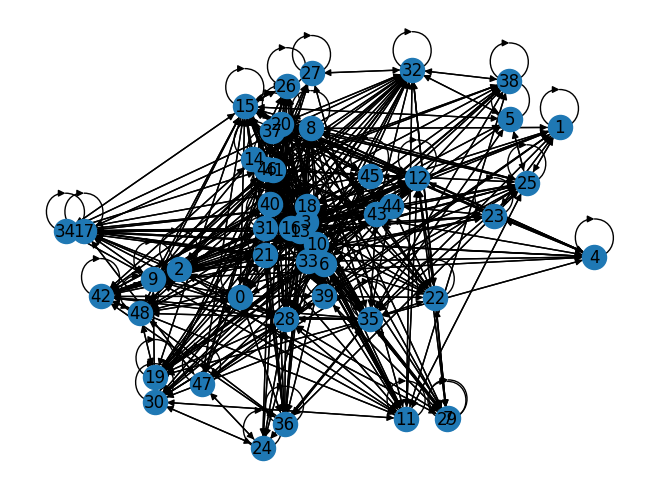

In [167]:
nx.draw(G, with_labels = True)

In [168]:
import networkx as nx
import numpy as np
m = dependency_matrix.copy()
m = np.array(m*100-np.identity(49)*100, dtype=int)
labels = dependency_matrix.columns

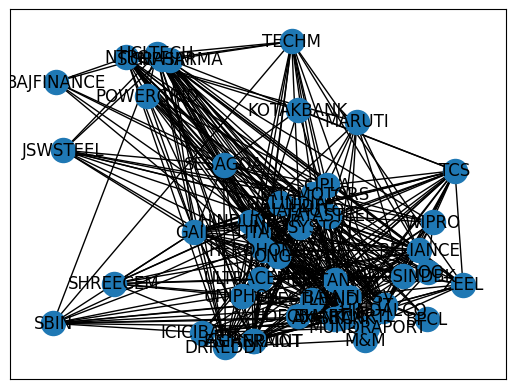

In [169]:
A2 = pd.DataFrame(m, index=labels, columns=labels)
nx.draw_networkx(nx.from_pandas_adjacency(A2))